# Applied Data Science and Machine Learning
## A program by IIT Madras and TalentSprint
### Mini Project: Healthcare classification

## About Dataset
###Context:
This synthetic healthcare dataset has been created to serve as a valuable resource for data science, machine learning, and data analysis enthusiasts. It is designed to mimic real-world healthcare data, enabling users to practice, develop, and showcase their data manipulation and analysis skills in the context of the healthcare industry.

###Inspiration:
The inspiration behind this dataset is rooted in the need for practical and diverse healthcare data for educational and research purposes. Healthcare data is often sensitive and subject to privacy regulations, making it challenging to access for learning and experimentation. To address this gap, I have leveraged Python's Faker library to generate a dataset that mirrors the structure and attributes commonly found in healthcare records. By providing this synthetic data, I hope to foster innovation, learning, and knowledge sharing in the healthcare analytics domain.

###Dataset Information:
Each column provides specific information about the patient, their admission, and the healthcare services provided, making this dataset suitable for various data analysis and modeling tasks in the healthcare domain. Here's a brief explanation of each column in the dataset


* **Name**: This column represents the name of the patient associated with the
healthcare record.
* **Age**: The age of the patient at the time of admission, expressed in years.
* **Gender**: Indicates the gender of the patient, either "Male" or "Female."
* **Blood Type**: The patient's blood type, which can be one of the common blood types (e.g., "A+", "O-", etc.).
* **Medical Condition**: This column specifies the primary medical condition or diagnosis associated with the patient, such as "Diabetes," "Hypertension," "Asthma," and more.
* **Date of Admission**: The date on which the patient was admitted to the healthcare facility.
* **Doctor**: The name of the doctor responsible for the patient's care during their admission.
* **Hospital**: Identifies the healthcare facility or hospital where the patient was admitted.
* **Insurance Provider**: This column indicates the patient's insurance provider, which can be one of several options, including "Aetna," "Blue Cross," "Cigna," "UnitedHealthcare," and "Medicare."
* **Billing Amount**: The amount of money billed for the patient's healthcare services during their admission. This is expressed as a floating-point number.
* **Room Number**: The room number where the patient was accommodated during their admission.
* **Admission Type**: Specifies the type of admission, which can be "Emergency," "Elective," or "Urgent," reflecting the circumstances of the admission.
* **Discharge Date**: The date on which the patient was discharged from the healthcare facility, based on the admission date and a random number of days within a realistic range.
* **Medication**: Identifies a medication prescribed or administered to the patient during their admission. Examples include "Aspirin," "Ibuprofen," "Penicillin," "Paracetamol," and "Lipitor."
* **Test Results**: Describes the results of a medical test conducted during the patient's admission. Possible values include "Normal," "Abnormal," or "Inconclusive," indicating the outcome of the test.

In [34]:
!pip install gdown


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [35]:
#@title Download dataset
!gdown "1x6Lt9hOEkkAWar0Epz-HM8Dgjk0kUKlX&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=1x6Lt9hOEkkAWar0Epz-HM8Dgjk0kUKlX&confirm=t
To: c:\Users\DELL\OneDrive\Desktop\IIT Madras Project\Project3\healthcare_dataset.csv

  0%|          | 0.00/8.40M [00:00<?, ?B/s]
  6%|▌         | 524k/8.40M [00:00<00:04, 1.86MB/s]
 19%|█▊        | 1.57M/8.40M [00:00<00:01, 3.74MB/s]
 31%|███       | 2.62M/8.40M [00:00<00:01, 4.55MB/s]
 44%|████▎     | 3.67M/8.40M [00:00<00:00, 5.08MB/s]
 56%|█████▌    | 4.72M/8.40M [00:00<00:00, 5.54MB/s]
 69%|██████▊   | 5.77M/8.40M [00:01<00:00, 5.81MB/s]
 81%|████████  | 6.82M/8.40M [00:01<00:00, 5.77MB/s]
 94%|█████████▎| 7.86M/8.40M [00:01<00:00, 5.76MB/s]
100%|██████████| 8.40M/8.40M [00:01<00:00, 5.32MB/s]


## Import Libraries

In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Import necessary libraries for machine learning
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import LabelEncoder, OneHotEncoder #Label Encoder/One Hot Encoder
from sklearn.metrics import confusion_matrix #Confusion Matrix

## Load the csv file ( 1 Mark)

In [37]:
import pandas as pd

# Replace 'data.csv' with the actual filename if different
df = pd.read_csv('healthcare_dataset.csv')

In [38]:
df

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55495,eLIZABeTH jaCkSOn,42,Female,O+,Asthma,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,2650.714952,417,Elective,2020-09-15,Penicillin,Abnormal
55496,KYle pEREz,61,Female,AB-,Obesity,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,31457.797307,316,Elective,2020-02-01,Aspirin,Normal
55497,HEATher WaNG,38,Female,B+,Hypertension,2020-07-13,Joe Jacobs DVM,"and Mahoney Johnson Vasquez,",UnitedHealthcare,27620.764717,347,Urgent,2020-08-10,Ibuprofen,Abnormal
55498,JENniFER JOneS,43,Male,O-,Arthritis,2019-05-25,Kimberly Curry,"Jackson Todd and Castro,",Medicare,32451.092358,321,Elective,2019-05-31,Ibuprofen,Abnormal


In [39]:
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


## Data Exploration ( 2 Marks)

In [40]:
print(df.dtypes)

Name                   object
Age                     int64
Gender                 object
Blood Type             object
Medical Condition      object
Date of Admission      object
Doctor                 object
Hospital               object
Insurance Provider     object
Billing Amount        float64
Room Number             int64
Admission Type         object
Discharge Date         object
Medication             object
Test Results           object
dtype: object


In [41]:
print(df.shape)

(55500, 15)


In [42]:
missing_values = df.isnull().sum()
print(missing_values)

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64


In [43]:
# Identify numerical features
numerical_features = df.select_dtypes(include=['number']).columns.tolist()
print("Numerical features:", numerical_features)

# Identify categorical features
categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()
print("Categorical features:", categorical_features)

Numerical features: ['Age', 'Billing Amount', 'Room Number']
Categorical features: ['Name', 'Gender', 'Blood Type', 'Medical Condition', 'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider', 'Admission Type', 'Discharge Date', 'Medication', 'Test Results']


## Data Visualization ( 2 Marks)

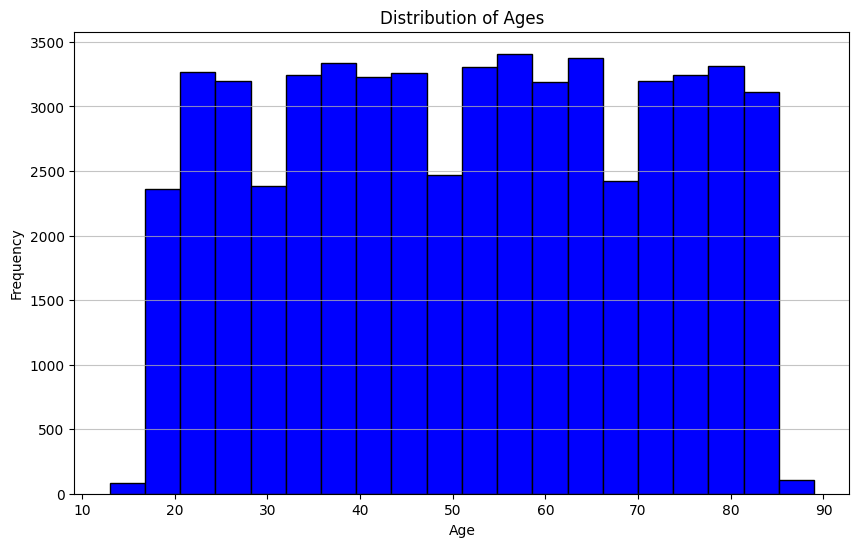

In [44]:
# Replace 'age' with the actual column name for ages in your DataFrame
plt.figure(figsize=(10, 6))
plt.hist(df['Age'].dropna(), bins=20, color='blue', edgecolor='black')  # Adjust 'age' if necessary
plt.title('Distribution of Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [45]:
# Replace 'target' with the actual name of your target column
category_counts = df['Blood Type'].value_counts()

# Print the counts of each category
print("Counts of each category in the target column:")
print(category_counts)

Counts of each category in the target column:
Blood Type
A-     6969
A+     6956
AB+    6947
AB-    6945
B+     6945
B-     6944
O+     6917
O-     6877
Name: count, dtype: int64


In [46]:
# Replace 'target' with the actual name of your target column
category_counts = df['Medical Condition'].value_counts()

# Print the counts of each category
print("Counts of each category in the target column:")
print(category_counts)

Counts of each category in the target column:
Medical Condition
Arthritis       9308
Diabetes        9304
Hypertension    9245
Obesity         9231
Cancer          9227
Asthma          9185
Name: count, dtype: int64


In [47]:
# Replace 'target' with the actual name of your target column
category_counts = df['Insurance Provider'].value_counts()

# Print the counts of each category
print("Counts of each category in the target column:")
print(category_counts)

Counts of each category in the target column:
Insurance Provider
Cigna               11249
Medicare            11154
UnitedHealthcare    11125
Blue Cross          11059
Aetna               10913
Name: count, dtype: int64


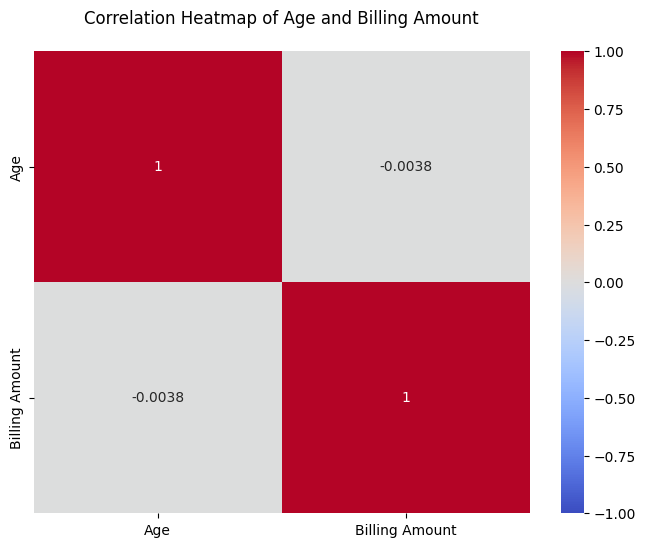

In [48]:
# Select only the 'age' and 'billing_amount' columns
selected_data = df[['Age', 'Billing Amount']]  # Replace with actual column names if different

# Calculate the correlation matrix for the selected columns
correlation_matrix = selected_data.corr()

# Increase the size of the heatmap
plt.figure(figsize=(8, 6))  # Adjust the size as needed

# Create the heatmap object
heatmap = sns.heatmap(
    correlation_matrix,
    vmin=-1, vmax=1,      # Set the range of values displayed on the colormap
    annot=True,           # Display the correlation values on the heatmap
    cmap='coolwarm',      # Choose a colormap
)

# Set the title of the heatmap
plt.title('Correlation Heatmap of Age and Billing Amount', pad=20)

# Show the heatmap
plt.show()

## Preprocessing Data ( 2 Marks)

In [49]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load your dataset
df = pd.read_csv('healthcare_dataset.csv')

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Identify categorical columns (you may want to specify which columns to encode)
categorical_cols = df.select_dtypes(include=['object']).columns

# Apply label encoding to each categorical column
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

In [50]:
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,3068,30,1,5,2,1729,26612,29933,1,18856.281306,328,2,1730,3,2
1,15211,62,1,0,5,104,33648,16012,3,33643.327287,265,1,109,1,1
2,6476,76,0,1,5,1233,37828,5473,0,27955.096079,205,1,1247,0,2
3,26935,28,0,6,3,560,22511,12317,3,37909.782410,450,0,589,1,0
4,26241,43,0,2,2,1230,21259,33598,0,14238.317814,458,2,1249,4,0


In [51]:
# Apply one-hot encoding to specified columns
columns_to_encode = ['Blood Type', 'Medical Condition', 'Admission Type', 'Medication']
df_encoded = pd.get_dummies(df, columns=columns_to_encode, drop_first=True)

In [52]:
df_encoded.head()

,Name,Age,Gender,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Discharge Date,...,Medical Condition_2,Medical Condition_3,Medical Condition_4,Medical Condition_5,Admission Type_1,Admission Type_2,Medication_1,Medication_2,Medication_3,Medication_4
0,3068,30,1,1729,26612,29933,1,18856.281306,328,1730,...,True,False,False,False,False,True,False,False,True,False
1,15211,62,1,104,33648,16012,3,33643.327287,265,109,...,False,False,False,True,True,False,True,False,False,False
2,6476,76,0,1233,37828,5473,0,27955.096079,205,1247,...,False,False,False,True,True,False,False,False,False,False
3,26935,28,0,560,22511,12317,3,37909.782410,450,589,...,False,True,False,False,False,False,True,False,False,False
4,26241,43,0,1230,21259,33598,0,14238.317814,458,1249,...,True,False,False,False,False,True,False,False,False,True


In [53]:
# Display the initial shape of the DataFrame
print("Initial shape:", df.shape)

# Identify columns with excessive missing values (e.g., more than 50% missing)
threshold = 0.5 * len(df)
columns_to_drop = df.columns[df.isnull().sum() > threshold]

# Drop the identified columns
df = df.drop(columns=columns_to_drop)

# Display shape after dropping columns
print("Shape after dropping columns with excessive missing values:", df.shape)

# Optionally, manually drop any columns you identify as irrelevant
# df = df.drop(columns=['Column1', 'Column2'])  # Example: replace with actual column names

# Display the remaining columns
print("Remaining columns:", df.columns.tolist())

Initial shape: (55500, 15)
Shape after dropping columns with excessive missing values: (55500, 15)
Remaining columns: ['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition', 'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider', 'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date', 'Medication', 'Test Results']


## Train/Test split dataset ( 1 Mark)

In [69]:
import pandas as pd
from sklearn.model_selection import train_test_split

X = df_encoded.drop(columns=['Age', 'Billing Amount'])  # Features
y = df_encoded[['Age', 'Billing Amount']]  # Targets as a DataFrame

In [72]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (44400, 27)
X_test shape: (11100, 27)
y_train shape: (44400, 2)
y_test shape: (11100, 2)


## Model Training ( 2 Marks)

* Train you model on any 3 algorithms and predict the test data
* Confusion matrix
* Classification report

In [55]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report

In [81]:
import numpy as np

# Convert one-hot encoded target to single-label format
y_train_single = np.argmax(y_train, axis=1)
y_test_single = np.argmax(y_test, axis=1)

In [82]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [83]:
logistic_model = LogisticRegression()
random_forest_model = RandomForestClassifier()
svm_model = SVC()

# Train the models
logistic_model.fit(X_train_scaled, y_train_single)
random_forest_model.fit(X_train_scaled, y_train_single)
svm_model.fit(X_train_scaled, y_train_single)

SVC()

In [84]:
logistic_pred = logistic_model.predict(X_test_scaled)
random_forest_pred = random_forest_model.predict(X_test_scaled)
svm_pred = svm_model.predict(X_test_scaled)

In [92]:
from sklearn.metrics import confusion_matrix, classification_report

# Logistic Regression evaluation
print("Logistic Regression:")
print(confusion_matrix(y_test_single, logistic_pred))
print(classification_report(y_test_single, logistic_pred))

Logistic Regression:
[[    0    14]
 [    0 11086]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       1.00      1.00      1.00     11086

    accuracy                           1.00     11100
   macro avg       0.50      0.50      0.50     11100
weighted avg       1.00      1.00      1.00     11100



c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [93]:
# Random Forest evaluation
print("Random Forest:")
print(confusion_matrix(y_test_single, random_forest_pred))
print(classification_report(y_test_single, random_forest_pred))

Random Forest:
[[    2    12]
 [    0 11086]]
              precision    recall  f1-score   support

           0       1.00      0.14      0.25        14
           1       1.00      1.00      1.00     11086

    accuracy                           1.00     11100
   macro avg       1.00      0.57      0.62     11100
weighted avg       1.00      1.00      1.00     11100



In [100]:
# SVM evaluation
print("Support Vector Machine:")
print(confusion_matrix(y_test_single, svm_pred))
print(classification_report(y_test_single, svm_pred))

Support Vector Machine:
[[    0    14]
 [    0 11086]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       1.00      1.00      1.00     11086

    accuracy                           1.00     11100
   macro avg       0.50      0.50      0.50     11100
weighted avg       1.00      1.00      1.00     11100



c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

### Report Your Observations

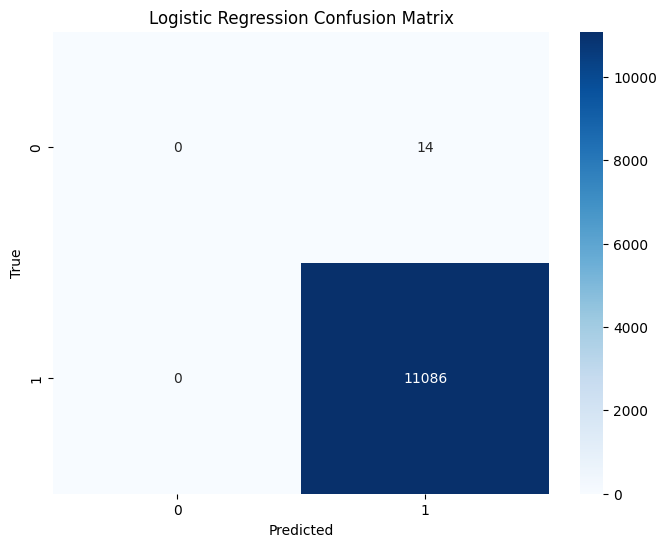

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Plot confusion matrices
plot_confusion_matrix(confusion_matrix(y_test_single, logistic_pred), "Logistic Regression Confusion Matrix")

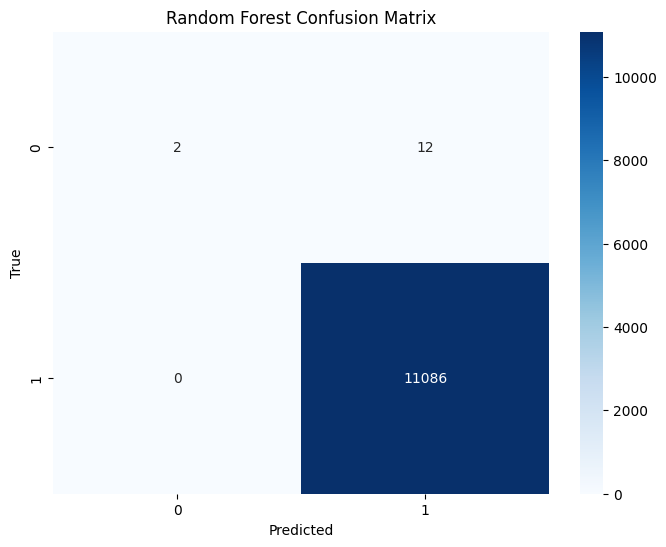

In [98]:
plot_confusion_matrix(confusion_matrix(y_test_single, random_forest_pred), "Random Forest Confusion Matrix")

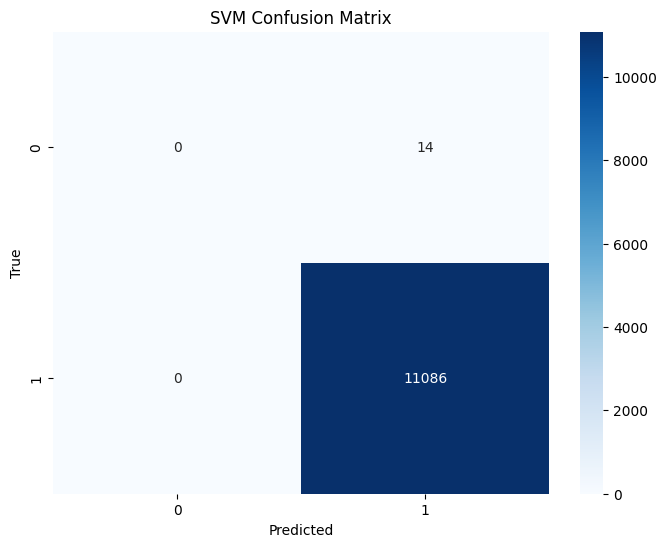

In [99]:
plot_confusion_matrix(confusion_matrix(y_test_single, svm_pred), "SVM Confusion Matrix")